# Assignment 01 - Source Distribution on an Airfoil 

Potential flow can represent a flow around ANY shape, not just a cylinder like we saw in Lesson03 

Objective is to build the flow around a NACA0012 airfoil, using a set of sources. 

For non-lifting bodies, you can use a *source* distribution on the body surface, superimposed with a free stream. 

**Before the assignment**
With alpha = $0^o$, 
* Where is the point of maximum pressure?
    * we saw that the point of maximum pressure was along the center line in the front of the object, basically the point of impact with an outward normal parallel the the free stream 
* What do we call that point?
    * we call that point the stagnation point. 
* Will the airfoil generate any lift?
    * sure? 
    
Loading the appropriate libraries and the data from the *resources* folder from the *lessons* folder in the **Aeropython** folder on github 


In [3]:
import numpy 
import math
from matplotlib import pyplot
%matplotlib inline

In [4]:
pwd

'/home/jennakosborn/mae6226/workspace'

In [5]:
x_sources=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_sources=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')
sigmas = numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')
numpy.size(sigmas)

100

We want to calculate 51 meshpoints in each direction and a domain of [-1,2] by [-0.5, 0.5], we will calculate the velocity components due to a set of *sources* plus a freestream with velocity of 1. We are also going to compute the pressure coefficient. 

Following the convention of the class for defining the variables 



In [13]:
N = 51   # number of points

# creating the mesh 
x_start, x_end = -1.0, 2.0 
y_start, y_end = -0.5, 0.5 
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)  

X, Y = numpy.meshgrid(x,y)

# compute the free stream velocity
u_inf = 1.0 
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [14]:
U_tot = numpy.zeros((100,51,51),dtype='float')
V_tot = numpy.zeros((100,51,51),dtype ='float')

# calculating all the individual velocity fields 
for i in range(100):
    U_tot[i,:,:] = sigmas[i]/(2*math.pi) * (X-x_sources[i])/((X-x_sources[i])**2 + (Y-y_sources[i])**2)
    V_tot[i,:,:] = sigmas[i]/(2*math.pi) * (Y-y_sources[i])/((X-x_sources[i])**2 + (Y-y_sources[i])**2)
    

# now summing them individually 
u = numpy.sum(U_tot,axis =0) + u_freestream
v = numpy.sum(V_tot,axis =0) + v_freestream

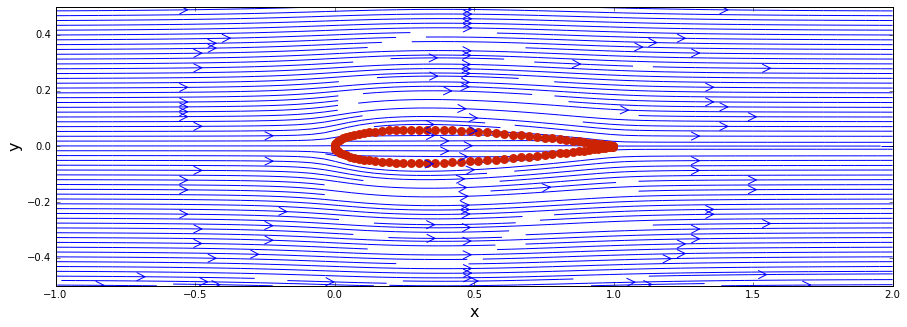

In [18]:
# plot the streamlines
size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
pyplot.scatter(x_sources, y_sources, color='#CD2305', s=80, marker='o', linewidth=0);



In [43]:
#finding the maximum of the pressure coefficient 
#computing the pressure coefficient field
cp = 1.0 - (u**2+v**2)/(u_inf)**2

cpmax = numpy.unravel_index(cp.argmax(),cp.shape)
cpmax


(25, 16)

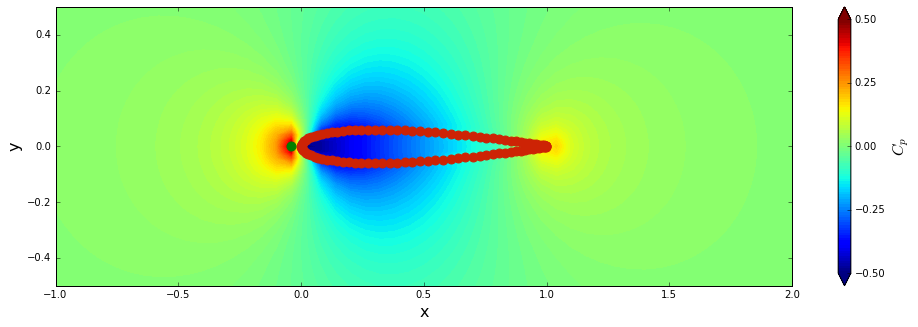

In [45]:
## plotting the pressure coefficient field
size = 15
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-0.5, 0.50, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-0.5, -0.25, 0.0, 0.25, 0.5])
pyplot.scatter(x_sources, y_sources, color='#CD2305', s=80, marker='o');
pyplot.scatter(X[cpmax], Y[cpmax], color = 'g', s = 80, marker = 'o');

In [46]:
cp[cpmax]

0.47144366133162408